# Evaluation Regression Models

Burada regressionla ilgili Evaluation Model performanslarini gorecegiz. Diyelim ki bir random forest modelimiz var ve bir predict yapti. Yapilan prediction sonuclarinin ne kadar dogru olup olmadigini inceleyecegiz. 

Linear Regression' da bir matematiksel ifademiz vardi;

> residual = y - y_head

> square_residual = (residual) ** 2

> sum_square_residual = sum((y - y_head) ** 2)

Biz buna SSR diyecegiz.

#### Evaluation Regression Models' da ise;

y_avg (ortalama) adinda bir degerimiz var. Matematiksel ifadesi ise,

> sum_square_total = sum((y - y_avg) ** 2) dir.

Biz buna SST diyecegiz.

> R^2 = 1 - (SSS / SST)

Eger R^2 degeri 1' e ne kadar yakin ise model performansimiz o kadar iyi demektir.

Simdi bunu Random Forest Regressionda kullanalim.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("random_forest_regression.csv", sep = ";", header = None)

In [3]:
x = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)

In [4]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100, random_state= 42)
rf.fit(x, y)

C:\Users\cevat\AppData\Local\Temp\ipykernel_1192\3713642102.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x, y)


RandomForestRegressor(random_state=42)

In [5]:
y_head = rf.predict(x)
y_head

array([89.1 , 83.3 , 72.1 , 61.9 , 52.1 , 42.8 , 30.8 , 22.7 , 12.65,
        8.5 ])

In [6]:
from sklearn.metrics import r2_score

print("Random Forest r_square score: ", r2_score(y, y_head))

Random Forest r_square score:  0.9798724794092587


y ve predict ettigimiz y_head degeri karsilastirildiginda R^2 degerinin goruldugu uzere 1' e yakin bir sonuc elde ettik.

Bir de Linear Regressionda kullanalim.

In [7]:
df = pd.read_csv("linear_regression_dataset.csv", sep = ";")

In [8]:
# sklearn library
from sklearn.linear_model import LinearRegression

# linear regression model
linear_reg = LinearRegression()

x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

linear_reg.fit(x, y)

LinearRegression()

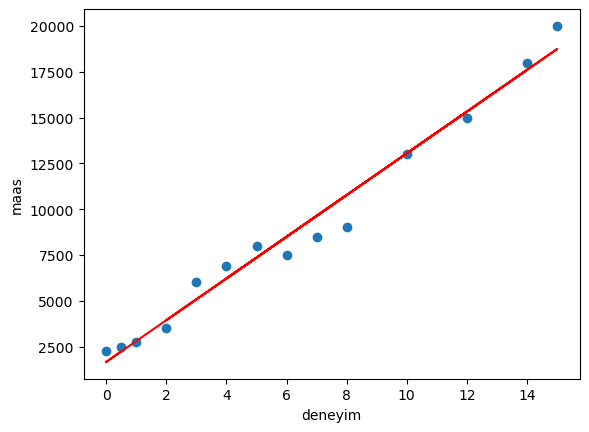

In [9]:
plt.scatter(df.deneyim, df.maas)
plt.xlabel("deneyim")
plt.ylabel("maas")

y_head = linear_reg.predict(x) # maas
plt.plot(x, y_head, color = "red")

In [10]:
from sklearn.metrics import r2_score

print("Linear Regression r_square score: ", r2_score(y, y_head))

Linear Regression r_square score:  0.9775283164949902
